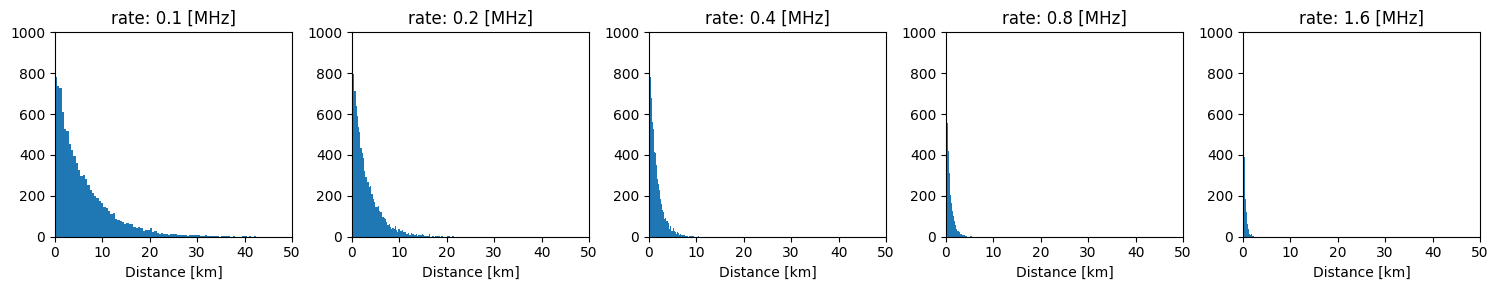

In [2]:
import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,5,  figsize=(15, 3))
for i,ax in enumerate(axs):
    rate = 0.1e6 * 2**i
    dts = np.random.default_rng().exponential(scale=1/rate, size=10000)
    ax.hist(con.speed_of_light * dts * 2 / 1000,bins=100)
    ax.set_xlabel('Distance [km]')
    ax.set_xlim([0,50])
    ax.set_ylim([0,1000])
    ax.set_title(f'rate: {rate/1e6} [MHz]')
plt.tight_layout()

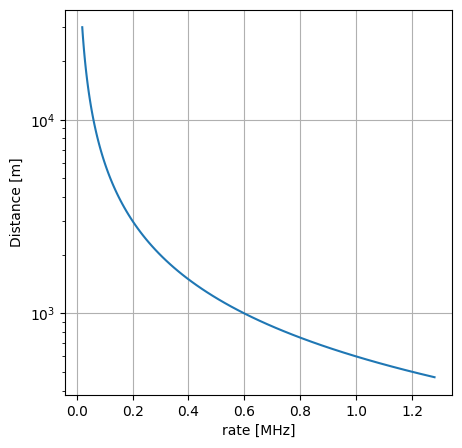

In [3]:

rates = [0.01e6 * 2**i for i in np.linspace(1,7,100)]
fig, axs = plt.subplots(1,1,  figsize=(5, 5))
axs.plot(np.array(rates) / 1e6, [con.speed_of_light * 2 / rate for rate in rates])
axs.set_ylabel('Distance [m]')
axs.set_yscale('log')
axs.set_xlabel('rate [MHz]')
axs.grid()

In [318]:
from scipy.stats import binom, norm, truncnorm

pos = 10
values = [i*10 for i in range(101)]

loc = values.index(pos)/len(values)
a, b = 0-loc,1-loc
x = np.linspace(truncnorm.ppf(0.00000001, a, b),
                truncnorm.ppf(0.99999999, a, b), len(values))

std = 0.1
probs = truncnorm.pdf(x, a/std, b/std, scale=std, loc=loc)/len(x)
err = 1-sum(probs)
probs[probs.argmax()] += err
samples = np.random.choice(values, size=100000 , p=probs)

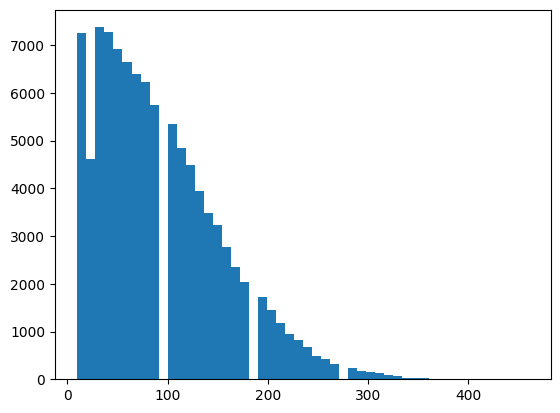

In [319]:
plt.hist(samples, bins=50)
plt.show()

In [317]:
probs.argmax()

2

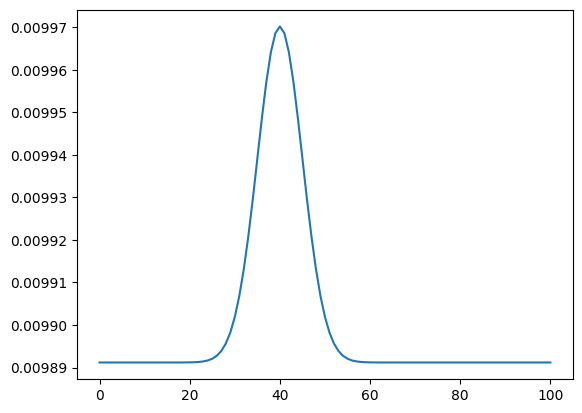

In [257]:
plt.plot(probs)

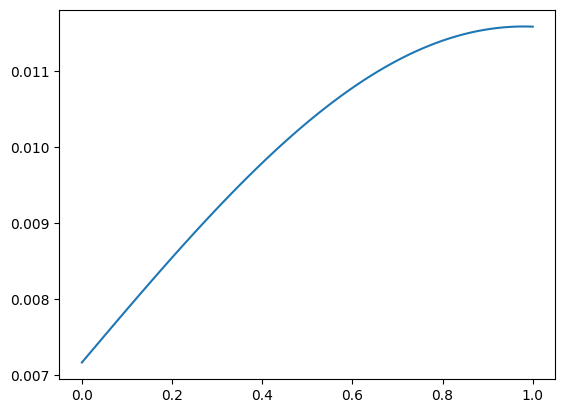

In [93]:
plt.plot(x,truncnorm.pdf(x, a, b, loc=loc)/len(x))


In [94]:
bulk = sum((truncnorm.pdf(x, a, b, loc=loc)/len(x))[:-1])
1-bulk

0.01221338600966737

In [95]:
(truncnorm.pdf(x, a, b, loc=loc)/len(x))[-1]

0.011580187998785806

In [342]:
import torch.multiprocessing as mp
import time

with mp.Pool(processes=10) as pool:
    y_temp = pool.map(np.sin, [i for i in np.linspace(2*np.pi,0,10000)])
    pool.close()
    pool.join()

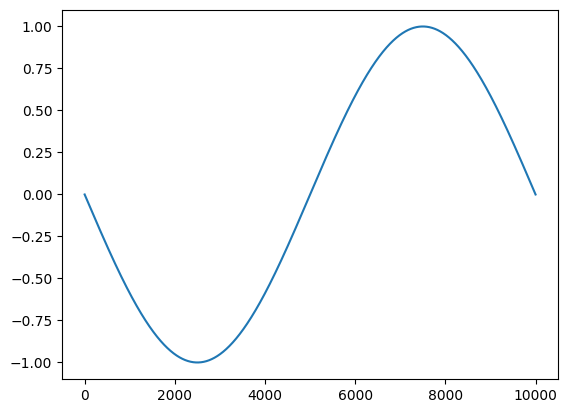

In [343]:
plt.plot(y_temp)

In [4]:
import numpy as np
a = np.array([1,2,3])

In [6]:
a[:-0]

array([], dtype=int64)